In [25]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import uuid

In [2]:
# Initialize Faker
fake = Faker()

In [3]:
num_records = 100000

In [4]:
customer_ids = []
transaction_ids = []
transaction_amounts = []
transaction_types = []
transaction_dates = []

In [5]:
# Generate synthetic data
for _ in range(num_records):
    customer_ids.append(str(uuid.uuid4()))  
    transaction_ids.append(str(uuid.uuid4())) 
    transaction_amounts.append(round(random.uniform(500.0, 100000.0), 2))  
    transaction_types.append(random.choice(['deposit', 'withdrawal','Transfers','Loan and credit','Bill Payments']))  
    transaction_dates.append(fake.date_between(start_date='-1y', end_date='today'))  

In [6]:
# Create a DataFrame
df = pd.DataFrame({
    'customer_id': customer_ids,
    'transaction_id': transaction_ids,
    'transaction_amount': transaction_amounts,
    'transaction_type': transaction_types,
    'transaction_date': transaction_dates
})

In [7]:
df.head()

,customer_id,transaction_id,transaction_amount,transaction_type,transaction_date
0,944deed8-ad3b-40e9-b769-3c29e05086bd,52ea60ff-4fb6-4a2b-8809-4984c12dd42e,88442.36,withdrawal,2024-07-10
1,51cf415a-7201-4ee8-9d07-a61dccff84bd,4cb1fa20-52d5-4f47-9e0d-5388890d5be1,23184.30,deposit,2024-06-14
2,6c6723e6-8461-4a00-835e-2954dd4ff44d,f52ec63e-968b-4671-9a7b-857dd3c03e4f,91587.72,Bill Payments,2024-06-07
3,787c1bac-ec77-4393-b179-f1fde8dd8712,10ca6c2a-da46-478b-a149-2f7bc5b296a7,92964.07,Transfers,2024-03-22
4,4e7e3135-b5d4-442c-baab-32a063077c78,06509044-b0e0-4d13-80dd-b434835dcd33,30065.41,Transfers,2024-07-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  object 
 1   transaction_id      100000 non-null  object 
 2   transaction_amount  100000 non-null  float64
 3   transaction_type    100000 non-null  object 
 4   transaction_date    100000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [10]:
final_df = df.copy()

In [11]:
# Extracting the year, month, and day from date
final_df['year'] = pd.to_datetime(final_df['transaction_date']).dt.year
final_df['month'] = pd.to_datetime(final_df['transaction_date']).dt.month
final_df['day'] = pd.to_datetime(final_df['transaction_date']).dt.day

In [12]:
# removing unique ID columns and date column
final_df.drop(columns=['customer_id','transaction_id','transaction_date'],inplace=True)

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_amount  100000 non-null  float64
 1   transaction_type    100000 non-null  object 
 2   year                100000 non-null  int32  
 3   month               100000 non-null  int32  
 4   day                 100000 non-null  int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 2.7+ MB


In [14]:
final_df.isnull().sum()

transaction_amount    0
transaction_type      0
year                  0
month                 0
day                   0
dtype: int64

In [15]:
final_df.describe()

,transaction_amount,year,month,day
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50363.574151,2023.726350,6.519930,15.728660
std,28764.833913,0.445834,3.449757,8.822191
min,500.200000,2023.000000,1.000000,1.000000
25%,25515.052500,2023.000000,4.000000,8.000000
50%,50304.105000,2024.000000,7.000000,16.000000
75%,75324.030000,2024.000000,10.000000,23.000000
max,99999.930000,2024.000000,12.000000,31.000000


In [16]:
# Feature encoding
OHE = OneHotEncoder(sparse_output=False, drop='first')
encoded= OHE.fit_transform(final_df[['transaction_type']])

In [17]:
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(['transaction_type']))

In [18]:
encoded_data = pd.concat([final_df.drop(['transaction_type'], axis=1), encoded_df], axis=1)
encoded_data

,transaction_amount,year,month,day,transaction_type_Loan and credit,transaction_type_Transfers,transaction_type_deposit,transaction_type_withdrawal
0,88442.36,2024,7,10,0.0,0.0,0.0,1.0
1,23184.30,2024,6,14,0.0,0.0,1.0,0.0
2,91587.72,2024,6,7,0.0,0.0,0.0,0.0
3,92964.07,2024,3,22,0.0,1.0,0.0,0.0
4,30065.41,2024,7,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99995,17069.97,2024,2,6,0.0,0.0,0.0,0.0
99996,78630.31,2024,8,25,0.0,0.0,0.0,1.0
99997,32491.88,2024,2,20,1.0,0.0,0.0,0.0
99998,77005.91,2024,7,4,0.0,0.0,0.0,0.0


In [19]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_data)

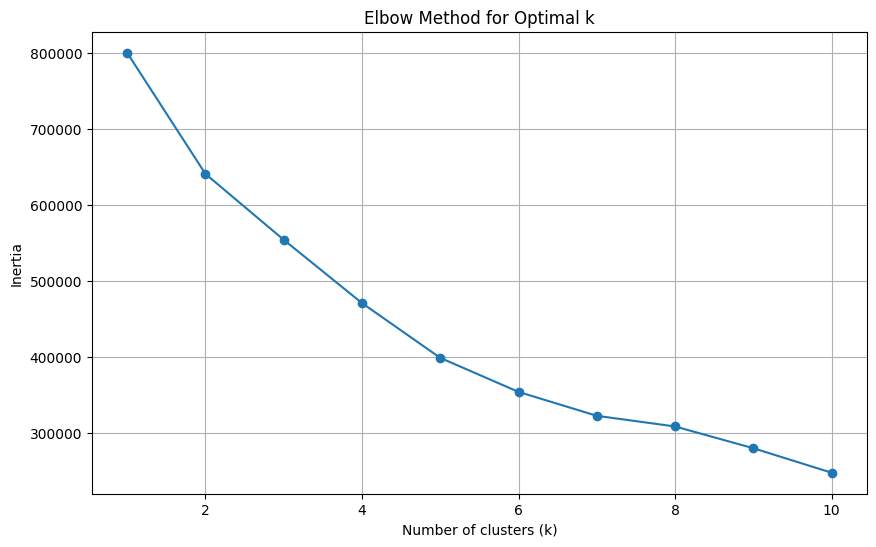

In [20]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [21]:
# Determine the optimal number of clusters using silhouette_score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"For n_clusters={k}, Silhouette Score={score:.2f}")

For n_clusters=2, Silhouette Score=0.23
For n_clusters=3, Silhouette Score=0.24
For n_clusters=4, Silhouette Score=0.27
For n_clusters=5, Silhouette Score=0.29
For n_clusters=6, Silhouette Score=0.28
For n_clusters=7, Silhouette Score=0.30
For n_clusters=8, Silhouette Score=0.28
For n_clusters=9, Silhouette Score=0.31


In [22]:
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)


KMeans(n_clusters=7, random_state=42)

In [23]:
import pickle

In [30]:
# Save the encoder
with open('cus_seg_encoder.pkl', 'wb') as f:
    pickle.dump(OHE, f)

In [31]:
# Save the scaler
with open('cus_seg__scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [32]:
# Save the trained model 
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)